<a href="https://colab.research.google.com/github/Priyatomar-56/Classification-_on_Histopathology_Dataset/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/gagan-iitb/CS550.git

fatal: destination path 'CS550' already exists and is not an empty directory.


In [ ]:
import os
import pandas as pd
import numpy as np
import warnings
# from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')
from pathlib import Path
from google.colab.patches import cv2_imshow

In [ ]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
print(len(os.listdir('/content/CS550/Prog_Assignments/Asg4_dataset')))

21


In [ ]:
os.getcwd()

'/content'

In [ ]:
# os.mkdir('Class_1')
# os.mkdir('Class_0')

In [ ]:
unzip_data("/content/CS550/Prog_Assignments/Asg4_dataset/test.zip")

In [ ]:
# cd Class_0

In [ ]:
cwd = os.getcwd()
target='/content/CS550/Prog_Assignments/Asg4_dataset/'
print(cwd)
# os.mkdir('/content/CS550/Prog_Assignments/Asg4_dataset/Class_1')
# os.mkdir('/content/CS550/Prog_Assignments/Asg4_dataset/Class_0')
for i in os.listdir("/content/CS550/Prog_Assignments/Asg4_dataset"):
  print(i)
  if 'zip' in i and '1' in i:
    zip_ref = zipfile.ZipFile(target+i, "r")
    zip_ref.extractall(path='/content/CS550/Prog_Assignments/Asg4_dataset/Class_1')
  elif 'zip' in i and '0' in i :
    zip_ref = zipfile.ZipFile(target+ i, "r")
    zip_ref.extractall(path='/content/CS550/Prog_Assignments/Asg4_dataset/Class_0')

/content
0_g.zip
1_4.zip
Sample_Format.csv
1_3.zip
1_5.zip
1_2.zip
0_f.zip
0_e.zip
0_a.zip
0_h.zip
1_7.zip
1_1.zip
1_6.zip
test.zip
0_c.zip
0_b.zip
Class_0
Readme.md
0_d.zip
test2.zip
Class_1


In [ ]:
ORIG_PATH = "/content/CS550/Prog_Assignments/Asg4_dataset"
class_0_path = []
class_1_path = []
for folder in os.listdir(ORIG_PATH):
    class_0_folder = Path(ORIG_PATH+"/"+fo
    # class_1_folder = ORIG_PATH+'/1_'
    for f in os.listdir(class_0_folder):
        class_0_path.append(class_0_folder+f)
    # for f in os.listdir(class_1_folder):
    #     class_1_path.append(class_1_folder+f)

In [ ]:
/content/CS550/Prog_Assignments/Asg4_dataset/0_f.zip

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import matplotlib.image as mpimg
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras import metrics
#sklearn helpers
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [ ]:
C_0="/content/CS550/Prog_Assignments/Asg4_dataset/Class_0"
categories=(os.listdir(C_0))
print(categories)

['0_e', '0_g', '0_f', '0_b', '0_c', '0_h', '0_a', '0_d']


In [ ]:
C_1=os.listdir("/content/CS550/Prog_Assignments/Asg4_dataset/Class_1")

In [ ]:
C_1="/content/CS550/Prog_Assignments/Asg4_dataset/Class_1"
Categories=(os.listdir(C_1))
print(Categories)

['1_6', '1_4', '1_1', '1_7', '1_3', '1_2', '1_5']


In [ ]:
training_data_class_0=[]
label_0=[]
IMG_SIZE=32
def create_training_data():
  for i in categories:
    path= os.path.join(C_0,i)
    print("the path is ",path)
    # class_num=categories.index(i)
    # print(class_num)
    print(os.listdir(path))
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            img_array=img_array/255
            new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            new_array=new_array.flatten()
            new_array=np.array(new_array)
            # print(new_array)
            training_data_class_0.append(new_array)
            label_0.append(0)
        except Exception as e:
            pass
create_training_data()

the path is  /content/CS550/Prog_Assignments/Asg4_dataset/Class_0/0_h
['10301_idx5_x651_y2001_class0.png', '10260_idx5_x401_y301_class0.png', '10301_idx5_x1451_y1701_class0.png', '10300_idx5_x2301_y1801_class0.png', '10300_idx5_x2851_y1301_class0.png', '10262_idx5_x2351_y851_class0.png', '10301_idx5_x1501_y2001_class0.png', '10302_idx5_x301_y1451_class0.png', '10264_idx5_x1151_y551_class0.png', '10300_idx5_x2551_y351_class0.png', '10301_idx5_x2701_y1301_class0.png', '10301_idx5_x251_y2251_class0.png', '10301_idx5_x101_y1901_class0.png', '10264_idx5_x251_y1601_class0.png', '10300_idx5_x801_y2151_class0.png', '10301_idx5_x1801_y1451_class0.png', '10262_idx5_x2351_y2101_class0.png', '10262_idx5_x2751_y1001_class0.png', '10300_idx5_x401_y1151_class0.png', '10300_idx5_x1801_y901_class0.png', '10262_idx5_x2501_y1551_class0.png', '10264_idx5_x2301_y301_class0.png', '10262_idx5_x1951_y651_class0.png', '10301_idx5_x2351_y1551_class0.png', '10264_idx5_x2051_y951_class0.png', '10300_idx5_x501_y16

In [ ]:

from PIL import Image

this is main

In [ ]:
import cv2#reading and resizing
import numpy as np#arrays
import os#dealing with directories
from random import shuffle #to shuffle data
from tqdm import tqdm#loop progress bar
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt # for visualizations
import tensorflow as tf # For tensor operations
import pandas as pd # for manipulating data
import zipfile
import os, sys

In [ ]:
training_data=[]
label=[]
IMG_SIZE=50
def create_training_data():
  for i in categories:
    path= os.path.join(C_0,i)
    # print("the path is ",path)
    class_num=categories.index(i)
    # print(class_num)
    # print(os.listdir(path))
    for img in os.listdir(path):
        # try:
            img_array = cv2.imread(os.path.join(path,img))
            img_array=img_array/255
            # print(img_array)
            img_array=Image.fromarray(img_array,'RGB')
            new_array=img_array.resize((IMG_SIZE,IMG_SIZE))
            # new_array=new_array.flatten()
            new_array=np.array(new_array)
            new_array=new_array/255
            new_array=tf. image. rot90(new_array,k=1,name=None)
            training_data.append(new_array)
            # print(len(training_data))
            label.append(0)
        # except Exception as e:
        #     pass
create_training_data()

In [ ]:
print(len(training_data))

30635


In [ ]:
print(len(label))

30635


this is main

In [ ]:
# Image,
# appending label class 1
IMG_SIZE=50
def create_training_data():
  for i in Categories:
    path= os.path.join(C_1,i)
    # print("the path is ",path)
    # class_num=categories.index(i)
    # print(class_num)
    # print(os.listdir(path))
    for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            img_array=Image.fromarray(img_array,'RGB')
            new_array=img_array.resize((IMG_SIZE,IMG_SIZE))
            # new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
            # new_array=new_array.flatten()
            new_array=np.array(new_array)
            new_array=new_array/255
            new_array=tf. image. rot90(new_array,k=1,name=None)
            # print(new_array)
            training_data.append(new_array)
            # print(len(training_data))
            label.append(1)
create_training_data()

In [ ]:
random.shuffle(training_data)

In [ ]:
print(len(training_data))

55488


In [ ]:
random.shuffle(label)

In [ ]:
print(len(label))

55488


In [ ]:
training_data=np.array(training_data)
label=np.array(label)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(training_data,label,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)

(44390, 50, 50, 3)


In [ ]:
print(y_train.shape)

(44390,)


In [ ]:
print(x_test.shape)

(11098, 50, 50, 3)


In [ ]:
print(x_train.shape)

(44390, 50, 50, 3)


NORMALIZE THE DATA

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive


In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
from matplotlib.pyplot import Normalize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import normalize
from tensorflow.keras.utils import to_categorical

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense


In [ ]:
x_train=normalize(x_train,axis=1)
x_test=normalize(x_test,axis=1)
# Y_train=to_categorical(y_train,num_classes=2)

just for categorical cross entropy

In [ ]:
Y_train=to_categorical(y_train,num_classes=2)
Y_test=to_categorical(y_test,num_classes=2)

model building

In [ ]:
IMPUT_SIZE=32

for accuracy use dense =2; for crossentropuy and softmax
for binary crossentropy =1 , sigmoid

In [ ]:
model1=Sequential()
model1.add(Conv2D(32,(3,3),input_shape=(50,50,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(32,(3,3),kernel_initializer="he_uniform"))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64,(3,3),kernel_initializer="he_uniform"))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [ ]:
model1.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])


In [ ]:
model1.fit(x_train, y_train ,batch_size=16,verbose=1,epochs=10,validation_data=(x_test,y_test),shuffle=False )

Epoch 1/10
2775/2775 [==============================] - 159s 57ms/step - loss: 0.6883 - accuracy: 0.5520 - val_loss: 0.6879 - val_accuracy: 0.5512
Epoch 2/10
2775/2775 [==============================] - 158s 57ms/step - loss: 0.6878 - accuracy: 0.5523 - val_loss: 0.6879 - val_accuracy: 0.5512
Epoch 3/10
2775/2775 [==============================] - 156s 56ms/step - loss: 0.6878 - accuracy: 0.5523 - val_loss: 0.6879 - val_accuracy: 0.5512
Epoch 4/10
2775/2775 [==============================] - 156s 56ms/step - loss: 0.6878 - accuracy: 0.5523 - val_loss: 0.6879 - val_accuracy: 0.5512
Epoch 5/10
2775/2775 [==============================] - 156s 56ms/step - loss: 0.6877 - accuracy: 0.5523 - val_loss: 0.6879 - val_accuracy: 0.5512
Epoch 6/10
2775/2775 [==============================] - 160s 58ms/step - loss: 0.6877 - accuracy: 0.5523 - val_loss: 0.6879 - val_accuracy: 0.5512
Epoch 7/10
2775/2775 [==============================] - 158s 57ms/step - loss: 0.6877 - accuracy: 0.5523 - val_loss: 0

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(IMPUT_SIZE,IMPUT_SIZE,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),kernel_initializer="he_uniform"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),kernel_initializer="he_uniform"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
model.fit(x_train, Y_train ,batch_size=16,verbose=1,epochs=10,validation_data=(x_test,Y_test),shuffle=False )

Epoch 1/10
2775/2775 [==============================] - 61s 22ms/step - loss: 0.6114 - accuracy: 0.6634 - val_loss: 0.5511 - val_accuracy: 0.7272
Epoch 2/10
2775/2775 [==============================] - 60s 22ms/step - loss: 0.5395 - accuracy: 0.7347 - val_loss: 0.5056 - val_accuracy: 0.7592
Epoch 3/10
2775/2775 [==============================] - 60s 22ms/step - loss: 0.4962 - accuracy: 0.7618 - val_loss: 0.5079 - val_accuracy: 0.7417
Epoch 4/10
2775/2775 [==============================] - 61s 22ms/step - loss: 0.4715 - accuracy: 0.7827 - val_loss: 0.4579 - val_accuracy: 0.7860
Epoch 5/10
2775/2775 [==============================] - 60s 22ms/step - loss: 0.4561 - accuracy: 0.7917 - val_loss: 0.4429 - val_accuracy: 0.7948
Epoch 6/10
2775/2775 [==============================] - 60s 21ms/step - loss: 0.4440 - accuracy: 0.7994 - val_loss: 0.4819 - val_accuracy: 0.7610
Epoch 7/10
2775/2775 [==============================] - 62s 22ms/step - loss: 0.4361 - accuracy: 0.8048 - val_loss: 0.4954 -

In [ ]:
check= cv2.imread("/content/CS550/Prog_Assignments/Asg4_dataset/Class_0/0_b/10260_idx5_x101_y1101_class0.png")
img=Image.fromarray(check)
img=img.resize((32,32))
img=np.array(img)
input_img=np.expand_dims(img,axis=0)
result=model1.predict(input_img)
print(result)

[[0.]]


hence we can see the image belong to the class 0.

In [ ]:
Check= cv2.imread("/content/CS550/Prog_Assignments/Asg4_dataset/Class_1/1_2/10273_idx5_x851_y751_class0.png")
Img=Image.fromarray(Check)
img=Img.resize((32,32))
img=np.array(img)
input_img=np.expand_dims(img,axis=0)
result=model1.predict(input_img)
print(result)

[[0.]]


In [ ]:
from PIL import Image
from PIL import ImageEnhance
from skimage.io import imread
import matplotlib.pyplot as plt

ValueError: ignored

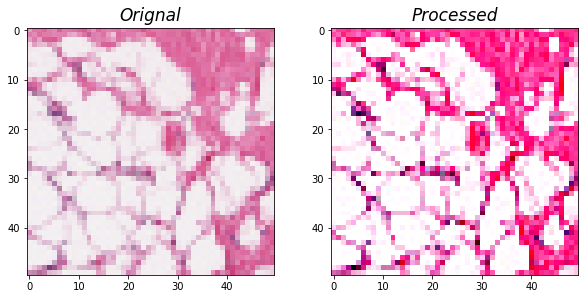

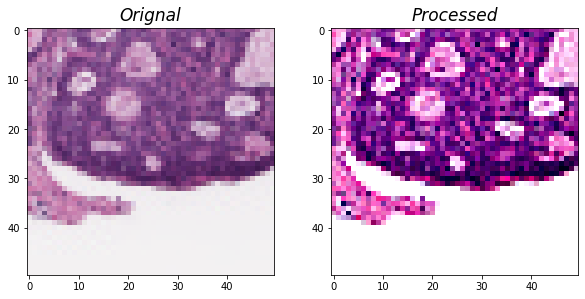

<Figure size 720x720 with 0 Axes>

In [ ]:

number_of_images=2

def Preprocess():
    j=1
    for i in categories:
        folder = os.path.join(C_0,i)
        a=random.choice(os.listdir(folder))

        image=Image.open(os.path.join(folder,a))
        image_duplicate=image.copy()
        plt.figure(figsize=(10,10))

        plt.subplot(number_of_images,2,j)
        plt.title(label='Orignal', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image)
        j+=1

        image1=ImageEnhance.Color(image_duplicate).enhance(1.35)
        image1=ImageEnhance.Contrast(image1).enhance(1.45)
        image1=ImageEnhance.Sharpness(image1).enhance(2.5)

        plt.subplot(number_of_images,2,j)
        plt.title(label='Processed', size=17, pad='7.0', loc="center", fontstyle='italic')
        plt.imshow(image1)
        j+=1

Preprocess()

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

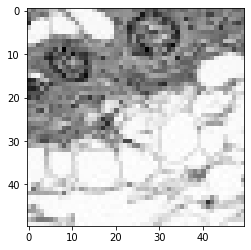

In [ ]:
for category in categories:
  path= os.path.join(C_0,category)
  for img in os.listdir(path):
      img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
      plt.imshow(img_array,cmap="gray")
      plt.show()
      break
  break

In [ ]:
print(os.listdir(path))

In [ ]:
for i in os.listdir(path):
  print(i)

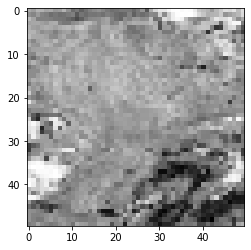

In [ ]:
path="/content/CS550/Prog_Assignments/Asg4_dataset/Class_0/0_a/10253_idx5_x1001_y1001_class0.png"
img_array = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap="gray")

In [ ]:
for i in x_train:
  R_train=tf. image. rot90(i,k=1,name=None)

In [ ]:
for i in x_test:
  R_test=tf. image. rot90(i,k=1,name=None)

In [ ]:
model1=Sequential()
model1.add(Conv2D(16,(3,3),padding="same",strides=1,input_shape=(50,50,3),activation='relu'))
model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
model1.add(Conv2D(128,(3,3),strides=1,padding="same",activation="relu"))
model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
model1.add(Flatten())
model1.add(Dense(16))
model1.add(Activation('relu'))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       18560     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 16)                2

In [ ]:
model1.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model1.fit(x_train, y_train ,batch_size=16,verbose=1,epochs=5,validation_data=(x_test,y_test),shuffle=False )

Epoch 1/5
2775/2775 [==============================] - 184s 66ms/step - loss: 0.0075 - accuracy: 0.9983 - val_loss: 4.0572e-05 - val_accuracy: 1.0000
Epoch 2/5
2775/2775 [==============================] - 181s 65ms/step - loss: 8.0792e-04 - accuracy: 0.9998 - val_loss: 8.3837e-07 - val_accuracy: 1.0000
Epoch 3/5
2775/2775 [==============================] - 180s 65ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 1.3881e-07 - val_accuracy: 1.0000
Epoch 4/5
2775/2775 [==============================] - 178s 64ms/step - loss: 6.3216e-04 - accuracy: 0.9999 - val_loss: 0.0010 - val_accuracy: 0.9997
Epoch 5/5
2775/2775 [==============================] - 180s 65ms/step - loss: 9.5768e-04 - accuracy: 0.9999 - val_loss: 6.3972e-04 - val_accuracy: 0.9997


  Question 1: Architecture: Create the following sequence of Layers. Fill in the answers in place of ?


In [ ]:
model1=Sequential()
model1.add(Conv2D(16,(3,3),padding="same",strides=1,input_shape=(50,50,3),activation='relu'))
model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
model1.add(Conv2D(128,(3,3),strides=1,padding="same",activation="relu"))
model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
model1.add(Flatten())
model1.add(Dense(16))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 50, 50, 16)        448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)       18560     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 128)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 15488)             0         
                                                                 
 dense_3 (Dense)             (None, 16)               

# Here are the solutions of the given table

In [ ]:
model1.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model1.fit(x_train, y_train ,batch_size=16,verbose=1,epochs=5,validation_data=(x_test,y_test),shuffle=False )

Epoch 1/5
2775/2775 [==============================] - 118s 42ms/step - loss: 0.6887 - accuracy: 0.5505 - val_loss: 0.6866 - val_accuracy: 0.5575
Epoch 2/5
2775/2775 [==============================] - 115s 41ms/step - loss: 0.6880 - accuracy: 0.5508 - val_loss: 0.6866 - val_accuracy: 0.5575
Epoch 3/5
2775/2775 [==============================] - 116s 42ms/step - loss: 0.6880 - accuracy: 0.5508 - val_loss: 0.6866 - val_accuracy: 0.5575
Epoch 4/5
2775/2775 [==============================] - 115s 42ms/step - loss: 0.6880 - accuracy: 0.5508 - val_loss: 0.6866 - val_accuracy: 0.5575
Epoch 5/5
2775/2775 [==============================] - 116s 42ms/step - loss: 0.6880 - accuracy: 0.5508 - val_loss: 0.6866 - val_accuracy: 0.5575


Question 2:Evaluate the performance after addition of 2 layers of Inception Modules and a Max Pool to the above neural network after S4.


In [ ]:
# from keras.utils import np_utils
Y_train=to_categorical(y_train,num_classes=2)
Y_test=to_categorical(y_test,num_classes=2)

In [ ]:
model1=Sequential()
model1.add(Conv2D(16,(3,3),padding="same",strides=1,input_shape=(50,50,3),activation='relu'))
model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
model1.add(Conv2D(128,(3,3),strides=1,padding="same",activation="relu"))
model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
model1.add(Conv2D(64,(1,1),padding='same', activation='relu'))
model1.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model1.add(Conv2D(64,(1,1),padding='same', activation='relu'))
model1.add(Conv2D(64,(5,5),padding='same', activation='relu'))
model1.add(MaxPooling2D((3,3),padding="same",strides=(1,1)))
model1.add(Conv2D(64,(1,1),padding='same', activation='relu'))
model1.add(Flatten())
model1.add(Dense(16))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [ ]:
model1.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model1.fit(x_train, y_train ,batch_size=16,verbose=1,epochs=5,validation_data=(x_test,y_test),shuffle=False )

Epoch 1/5
2775/2775 [==============================] - 238s 85ms/step - loss: 0.6885 - accuracy: 0.5517 - val_loss: 0.6879 - val_accuracy: 0.5513
Epoch 2/5
2775/2775 [==============================] - 233s 84ms/step - loss: 0.6877 - accuracy: 0.5523 - val_loss: 0.6879 - val_accuracy: 0.5513
Epoch 3/5
2775/2775 [==============================] - 233s 84ms/step - loss: 0.6877 - accuracy: 0.5523 - val_loss: 0.6879 - val_accuracy: 0.5513
Epoch 4/5
2775/2775 [==============================] - 237s 85ms/step - loss: 0.6877 - accuracy: 0.5523 - val_loss: 0.6879 - val_accuracy: 0.5513
Epoch 5/5
2775/2775 [==============================] - 233s 84ms/step - loss: 0.6877 - accuracy: 0.5523 - val_loss: 0.6879 - val_accuracy: 0.5513


## **Question:3**  Create a baseline Neural network using Transfer learning with Resnet-50 (pre-trained model). Compare with the networks A and B above. What do you learn from this?


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.applications.resnet50 import preprocess_input

In [ ]:
model = Sequential()

model.add(ResNet50(include_top=False, pooling='avg'))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(124, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train ,batch_size=16,verbose=1,epochs=5,shuffle=False )

Epoch 1/5
2775/2775 [==============================] - 4274s 2s/step - loss: 0.0000e+00 - accuracy: 0.4478
Epoch 2/5
2775/2775 [==============================] - 4297s 2s/step - loss: 0.0000e+00 - accuracy: 0.4478
Epoch 3/5
2775/2775 [==============================] - 4159s 1s/step - loss: 0.0000e+00 - accuracy: 0.4478
Epoch 4/5
1800/2775 [==================>...........] - ETA: 24:15 - loss: 0.0000e+00 - accuracy: 0.4477

 ResNets are one of the most efficient Neural Network Architectures, as they help in maintaining a low error rate much deeper in the network.We can conclude that the by using the resnet50 architecture we can get the more accuracy and less error.This used a stack of 3 layers instead of the earlier 2. Therefore, each of the 2-layer blocks in Resnet34 was replaced with a 3-layer bottleneck block, forming the Resnet 50 architecture. This has much higher accuracy than the 34-layer ResNet model.

**Question :4**  Experiment with number of layers, filter size, stride etc. and neurons per layer to increase the performance metrics. Apply other tweaks and tuning to improve accuracy. You must report the results for at least 2 different designs.

In [ ]:
Model1=Sequential()
Model1.add(Conv2D(16,(3,3),padding="same",strides=1,input_shape=(50,50,3),activation='relu'))
Model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
Model1.add(Conv2D(64,(3,3),strides=2,padding="same",activation="relu"))
Model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
Model1.add(Conv2D(128,(3,3),strides=2,padding="same",activation="relu"))
Model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
Model1.add(Flatten())
Model1.add(Dense(16))
Model1.add(Activation('relu'))
Model1.add(Dropout(0.5))
Model1.add(Dense(1))
Model1.add(Activation('sigmoid'))

In [ ]:
Model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Model1.fit(x_train, y_train ,batch_size=16,verbose=1,epochs=3,shuffle=False )

Epoch 1/3
2775/2775 [==============================] - 21s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5522
Epoch 2/3
2775/2775 [==============================] - 11s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5522
Epoch 3/3
2775/2775 [==============================] - 11s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5522


In [ ]:
M_Model1=Sequential()
M_Model1.add(Conv2D(16,(3,3),padding="same",strides=1,input_shape=(50,50,3),activation='relu'))
M_Model1.add(MaxPooling2D((3,3),padding="valid",strides=1))
M_Model1.add(Conv2D(64,(3,3),strides=2,padding="same",activation="relu"))
M_Model1.add(Flatten())
M_Model1.add(Dropout(0.5))
M_Model1.add(Dense(1))
M_Model1.add(Activation('sigmoid'))

In [ ]:
M_Model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
M_Model1.fit(x_train, y_train ,batch_size=16,verbose=1,epochs=3,shuffle=False )

Epoch 1/3
2775/2775 [==============================] - 21s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5532
Epoch 2/3
2775/2775 [==============================] - 11s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5532
Epoch 3/3
2775/2775 [==============================] - 11s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5532


lenet design

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(50,50,3)))
model.add(layers.AveragePooling2D())
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='relu'))
model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(units=1, activation = 'sigmoid'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train ,batch_size=16,verbose=1,epochs=3,shuffle=False )

Epoch 1/3
2775/2775 [==============================] - 12s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5521
Epoch 2/3
2775/2775 [==============================] - 11s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5522
Epoch 3/3
2775/2775 [==============================] - 11s 4ms/step - loss: 0.0000e+00 - accuracy: 0.5522


**Question:5** Compare the above networks, calculate AUC/ROC, summarize and explain your results.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [ ]:
preds = model.predict(x_test)

347/347 [==============================] - 1s 3ms/step


In [ ]:
from sklearn.metrics import roc_curve, auc
print(roc_curve(y_test, model.predict(x_test)))

347/347 [==============================] - 1s 2ms/step
(array([0., 1.]), array([0., 1.]), array([1., 0.], dtype=float32))


the roc_auc_score is 0.5

In [ ]:
from sklearn.metrics import roc_curve, auc
print(roc_auc_score(y_test, model.predict(x_test)))

347/347 [==============================] - 1s 3ms/step
0.5


In [ ]:
from sklearn.metrics import roc_curve, auc
print(roc_auc_score(y_test, M_Model1.predict(x_test)))

347/347 [==============================] - 1s 2ms/step
0.5


An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

## now testing the model on the test data and im getting accuracy of 55%

In [ ]:
unzip_data("/content/CS550/Prog_Assignments/Asg4_dataset/test2.zip")

In [ ]:
from PIL import Image

In [ ]:
testing_data=[]
test_label=[]
IMG_SIZE=50
def create_training_data():
  # for i in categories:
    path= "/content/test2"
    # print("the path is ",path)
    # class_num=categories.index(i)
    # print(class_num)
    # print(os.listdir(path))
    for img in os.listdir(path):
        # try:
            img_array = cv2.imread(os.path.join(path,img))
            img_array=img_array/255
            # print(img_array)
            img_array=Image.fromarray(img_array,'RGB')
            new_array=img_array.resize((IMG_SIZE,IMG_SIZE))
            # new_array=new_array.flatten()
            new_array=np.array(new_array)
            new_array=new_array/255
            new_array=tf. image. rot90(new_array,k=1,name=None)
            testing_data.append(new_array)
            # print(len(training_data))
            test_label.append(1)
        # except Exception as e:
        #     pass
create_training_data()

In [ ]:
print(len(testing_data))

3999


In [ ]:
print(len(test_label))

3999


In [ ]:
IMG_SIZE=50
def create_training_data():
  # for i in categories:
    path= "/content/test2"
    # print("the path is ",path)
    # class_num=categories.index(i)
    # print(class_num)
    # print(os.listdir(path))
    for img in os.listdir(path):
        # try:
            img_array = cv2.imread(os.path.join(path,img))
            img_array=img_array/255
            # print(img_array)
            img_array=Image.fromarray(img_array,'RGB')
            new_array=img_array.resize((IMG_SIZE,IMG_SIZE))
            # new_array=new_array.flatten()
            new_array=np.array(new_array)
            new_array=new_array/255
            new_array=tf. image. rot90(new_array,k=1,name=None)
            testing_data.append(new_array)
            # print(len(training_data))
            test_label.append(0)
        # except Exception as e:
        #     pass
create_training_data()

In [ ]:
print(len(testing_data))

7998


In [ ]:
print(len(test_label))

7998


In [ ]:
random.shuffle(testing_data)

In [ ]:
random.shuffle(test_label)

In [ ]:
testing_data=np.array(testing_data)
test_label=np.array(test_label)

In [ ]:
from sklearn.model_selection import train_test_split
T_train,T_test,Y_train,Y_test= train_test_split(testing_data,test_label,test_size=0.2,random_state=0)

In [ ]:
from matplotlib.pyplot import Normalize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import normalize
from tensorflow.keras.utils import to_categorical

In [ ]:
print(T_train.shape)

(6398, 50, 50, 3)


In [ ]:
print(T_test.shape)

(1600, 50, 50, 3)


In [ ]:
print(Y_train.shape)

(6398,)


In [ ]:
print(T_test.shape)

(1600, 50, 50, 3)


In [ ]:
T_train=normalize(T_train,axis=1)
T_test=normalize(T_test,axis=1)

In [ ]:
model1=Sequential()
model1.add(Conv2D(16,(3,3),padding="same",strides=1,input_shape=(50,50,3),activation='relu'))
model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
model1.add(Conv2D(128,(3,3),strides=1,padding="same",activation="relu"))
model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
model1.add(Flatten())
model1.add(Dense(16))
model1.add(Activation('relu'))
model1.add(Dense(1))
model1.add(Activation('sigmoid'))

In [ ]:
model1.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
model1.fit(T_train, Y_train ,batch_size=16,verbose=1,epochs=5,validation_data=(T_test,Y_test),shuffle=False )

Epoch 1/5
400/400 [==============================] - 11s 6ms/step - loss: 0.6934 - accuracy: 0.5038 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 2/5
400/400 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.4942 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 3/5
400/400 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.4939 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 4/5
400/400 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.4936 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 5/5
400/400 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.4939 - val_loss: 0.6931 - val_accuracy: 0.5019


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.metrics import roc_curve, auc
print(roc_auc_score(Y_test, model1.predict(T_test)))

50/50 [==============================] - 0s 2ms/step
0.5


In [ ]:
from sklearn.metrics import roc_curve, auc
print(roc_auc_score(Y_train, model1.predict(T_train)))

200/200 [==============================] - 1s 3ms/step
0.5


In [ ]:
Model1=Sequential()
Model1.add(Conv2D(16,(3,3),padding="same",strides=1,input_shape=(50,50,3),activation='relu'))
Model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
Model1.add(Conv2D(64,(3,3),strides=2,padding="same",activation="relu"))
Model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
Model1.add(Conv2D(128,(3,3),strides=2,padding="same",activation="relu"))
Model1.add(MaxPooling2D((3,3),padding="valid",strides=2))
Model1.add(Flatten())
Model1.add(Dense(16))
Model1.add(Activation('relu'))
Model1.add(Dropout(0.5))
Model1.add(Dense(1))
Model1.add(Activation('sigmoid'))

In [ ]:
Model1.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
Model1.fit(T_train, Y_train ,batch_size=16,verbose=1,epochs=5,validation_data=(T_test,Y_test),shuffle=False )

Epoch 1/5
400/400 [==============================] - 3s 5ms/step - loss: 0.6937 - accuracy: 0.5028 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 2/5
400/400 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.4945 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 3/5
400/400 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.4917 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 4/5
400/400 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.4905 - val_loss: 0.6931 - val_accuracy: 0.5019
Epoch 5/5
400/400 [==============================] - 2s 5ms/step - loss: 0.6932 - accuracy: 0.4911 - val_loss: 0.6931 - val_accuracy: 0.5019


In [ ]:
from sklearn.metrics import roc_curve, auc
print(roc_auc_score(Y_test, Model1.predict(T_test)))

50/50 [==============================] - 0s 2ms/step
0.5


In [ ]:
from sklearn.metrics import roc_curve, auc
print(roc_auc_score(Y_train, Model1.predict(T_train)))

200/200 [==============================] - 0s 2ms/step
0.5
